# Library and dataset import

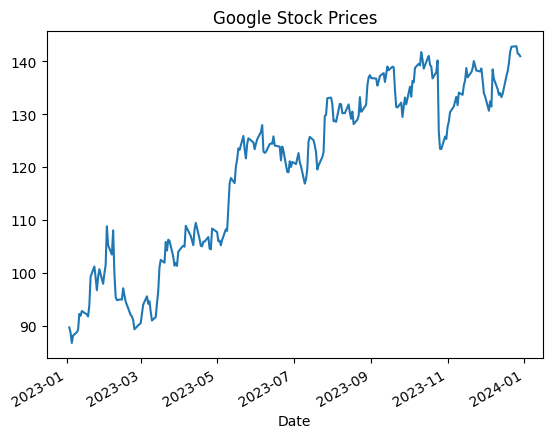

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# Download Google (Alphabet) stock price data using yfinance
data = yf.download('GOOG', start='2023-01-01', end='2023-12-31', progress=False)
data = data[['Close']]  # Select the 'Close' column
data.index = pd.to_datetime(data.index)

# Plot the stock prices
data['Close'].plot(title="Google Stock Prices")
plt.show()

# Check Stationarity

In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Close'])
print(f'p-value: {result[1]}')

p-value: 0.5481499315974281


# Apply Differencing if Necessary

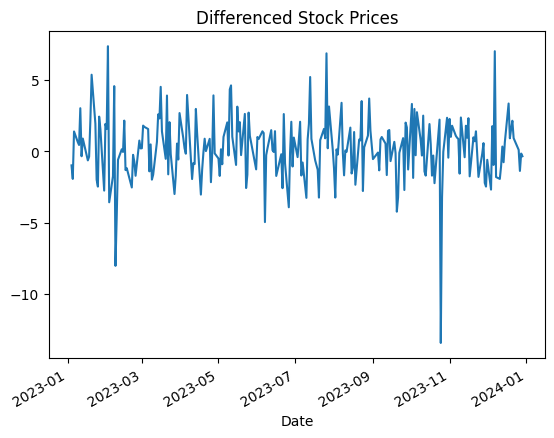

In [6]:
data_diff = data['Close'].diff().dropna()
data_diff.plot(title="Differenced Stock Prices")
plt.show()

# Build the ARIMA Model

In [7]:
model = ARIMA(data['Close'], order=(1, 1, 1))  # ARIMA(1,1,1)
model_fit = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Print the model summary

In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -556.222
Date:                Wed, 18 Dec 2024   AIC                           1118.444
Time:                        20:25:32   BIC                           1128.996
Sample:                             0   HQIC                          1122.691
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2175      1.593     -0.137      0.891      -3.339       2.904
ma.L1          0.2551      1.585      0.161      0.872      -2.852       3.362
sigma2         5.1023      0.255     19.985      0.0

# Make Predictions

In [11]:
forecast = model_fit.forecast(steps=30)  # Predict the next 5 days
print(forecast)

250    140.915003
251    140.918263
252    140.917554
253    140.917708
254    140.917675
255    140.917682
256    140.917680
257    140.917681
258    140.917681
259    140.917681
260    140.917681
261    140.917681
262    140.917681
263    140.917681
264    140.917681
265    140.917681
266    140.917681
267    140.917681
268    140.917681
269    140.917681
270    140.917681
271    140.917681
272    140.917681
273    140.917681
274    140.917681
275    140.917681
276    140.917681
277    140.917681
278    140.917681
279    140.917681
Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Plot the Forecast

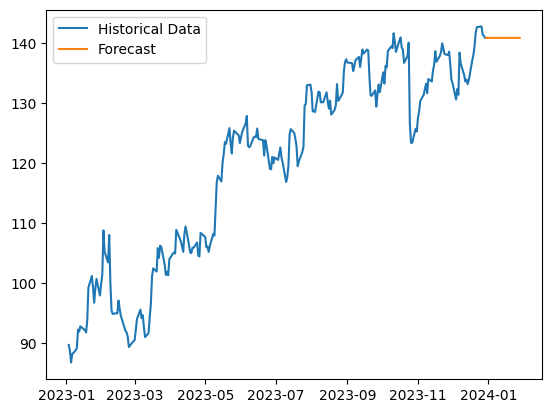

In [13]:
plt.plot(data['Close'], label="Historical Data")
plt.plot(pd.date_range(data.index[-1], periods=31, freq='D')[1:], forecast, label="Forecast")
plt.legend()
plt.show()